## Este notebook versa sobre Dynamic Programming & Data Science
### Trata-se de serie de temporal -- simulação de consumo diário

In [32]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from functools import lru_cache
import matplotlib.pyplot as plt

In [33]:
# parametros tecnicos
n = 30 # nr de dias
sca = 10 # desvio-padrao
loc = 100 # media ou valor de referencia
steps = 7 # numero de dias em avanço para previsao

In [34]:
# Função de Programação Dinâmica com memoização para minimizar picos de consumo
@lru_cache(maxsize=None)  # Decorador para memoização
# lru_cache = função para armazenar resultados, evitar recalculos recorrentes
def minimizar_picos_memoizado(dia, consumo):
    if dia == 0:
        return consumo[0]
    return min(minimizar_picos_memoizado(dia - 1, consumo) + abs(consumo[dia] - consumo[dia - 1]), consumo[dia])

In [35]:
# Série temporal de consumo fictícia
np.random.seed(42) # fixa-se a semente que será usada para gerar números aleatórios
# Consumo ao longo de 30 dias
# valor central = loc
# scale = definição do desvio padrao
# size = tamanho da amostra que será modelada como uma distribuição normal
consumo = np.random.normal(loc = loc,
                           scale= sca,
                           size= n)

In [36]:
# Construindo a lista de consumo otimizado
consumo_otimizado = [minimizar_picos_memoizado(dia, tuple(consumo)) for dia in range(len(consumo))]
# usamos tupla para garantir que não se altere os elementos já calculados e armazenados em cache.

In [37]:
# Modelagem de previsão usando Holt-Winters
# Holt-Winters = algoritmo que suaviza variações bruscas em séries temporais, baseando-se em médias, tendências e sazonalidades
model = ExponentialSmoothing(consumo_otimizado,
                             seasonal='add',
                             seasonal_periods= steps,
                             trend='add')

model_fit = model.fit()
consumo_suavizado = model_fit.fittedvalues 
previsao = model_fit.forecast(steps= steps)  # Previsão para os próximos 7 dias

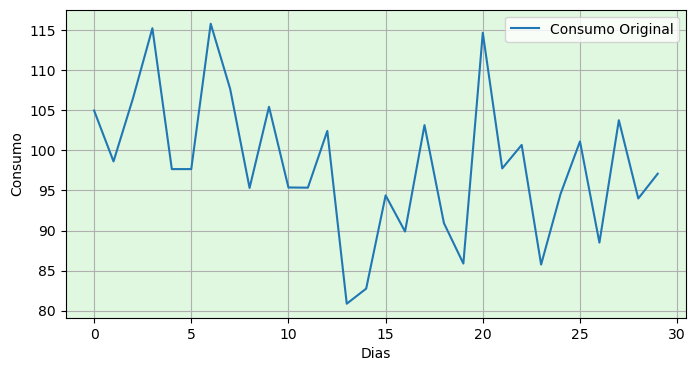

In [38]:
# Visualização
plt.figure(figsize = (8,4))
plt.gca().set_facecolor('#e0f7e0')
plt.plot(consumo, label="Consumo Original")
plt.xlabel("Dias")
plt.ylabel("Consumo")
plt.grid(True)
plt.legend()
plt.show()

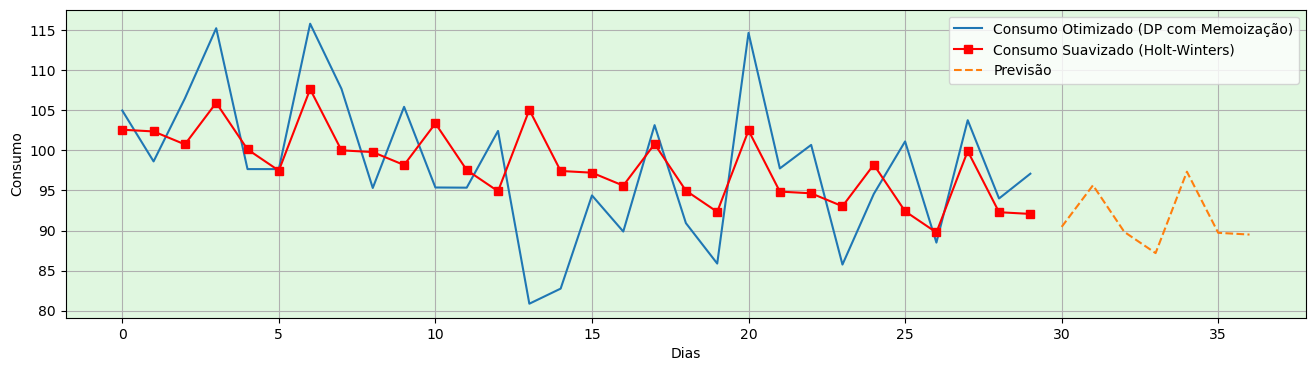

In [54]:
# Visualização
plt.figure(figsize = (16,4))
plt.gca().set_facecolor('#e0f7e0')
plt.plot(consumo_otimizado, label="Consumo Otimizado (DP com Memoização)")
plt.plot(consumo_suavizado, label="Consumo Suavizado (Holt-Winters)", linestyle='-', marker='s', color = 'red')
plt.plot(range(len(consumo), len(consumo) + len(previsao)), previsao, label="Previsão", linestyle='--')
plt.xlabel("Dias")
plt.ylabel("Consumo")
plt.grid(True)
plt.legend()
plt.show()
